<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro_to_ML/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [216]:
file_path = '/content/drive/MyDrive/ML-4105/cancer.csv'

# PROBLEM 1

In [217]:
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [218]:
# Extract the value from the data set
X = cancer.iloc[:,2:30].to_numpy()
Y = cancer.iloc[:, 1]
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
      

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [220]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [221]:
max_components = X_train.shape[1]

optimal_values = {'kernel': '', 'components': 0, 'accuracy': 0}

# Initialize variables
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    results[kernel] = {'accuracy': [], 'precision': [], 'recall': []}

# PCA and SVM
for components in range(1, max_components + 1):
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(X_train_sc)
    X_test_pca = pca.transform(X_test_sc)

    for kernel in kernels:
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, Y_train)

        Y_pred = svm.predict(X_test_pca)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = (precision_score(Y_test, Y_pred, pos_label='M'))
        recall = (recall_score(Y_test, Y_pred, pos_label='M'))

        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)


if accuracy > optimal_values['accuracy']:
    optimal_values['accuracy'] = accuracy
    optimal_values['kernel'] = kernel
    optimal_values['components'] = components
# Print the values
print(f"Optimal kernel: {optimal_values['kernel']}")
print(f"Optimal Number of Principal Components: {optimal_values['components']}")
print(f"Highest Classification Accuracy: {optimal_values['accuracy']}")



Optimal kernel: sigmoid
Optimal Number of Principal Components: 28
Highest Classification Accuracy: 0.9473684210526315


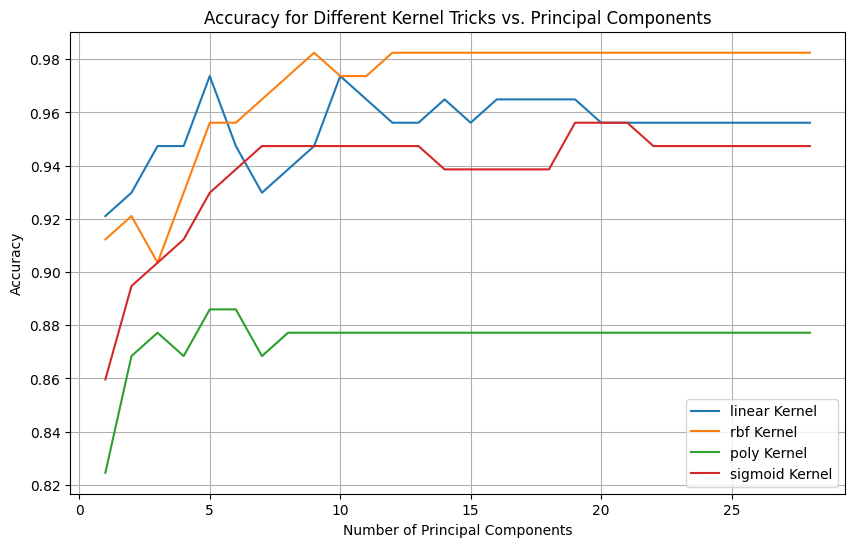

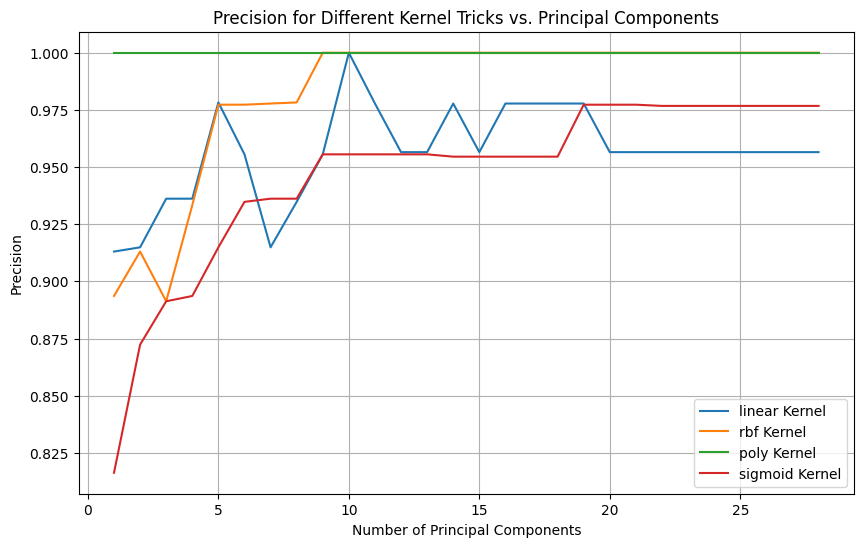

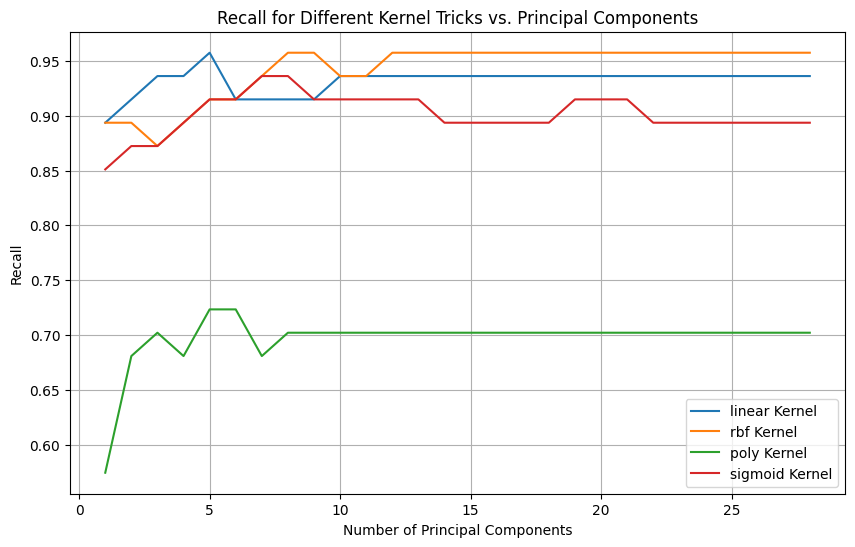

In [222]:
metrics = ['accuracy', 'precision', 'recall']
titles = ['Accuracy', 'Precision', 'Recall']

for idx, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    for kernel in kernels:
        plt.plot(range(1, max_components + 1), results[kernel][metric], label=f'{kernel} Kernel')
    plt.title(f'{titles[idx]} for Different Kernel Tricks vs. Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel(titles[idx])
    plt.legend()
    plt.grid(True)
    plt.show()




# PROBLEM 2


In [223]:
file_path_1 = '/content/drive/MyDrive/ML-4105/Housing.csv'

In [224]:
housing = pd.DataFrame(pd.read_csv(file_path_1))
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [225]:
# List of variables to map
feature_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Applying the function to the list
housing[feature_list] = housing[feature_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [226]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X1 = housing[features].values
Y1 = housing[['price']].values.reshape(-1,1)
X1[:5]

array([[7420,    4,    2,    3,    1,    0,    0,    0,    1,    2,    1],
       [8960,    4,    4,    4,    1,    0,    0,    0,    1,    3,    0],
       [9960,    3,    2,    2,    1,    0,    1,    0,    0,    2,    1],
       [7500,    4,    2,    2,    1,    0,    1,    0,    1,    3,    1],
       [7420,    4,    1,    2,    1,    1,    1,    0,    1,    2,    0]])

In [227]:
# split training and validation set 80/20
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X1_train_sc = sc_X.fit_transform(X1_train)
X1_test_sc = sc_X.fit_transform(X1_test)
X1_test.shape

(109, 11)

In [234]:
accuracy = []
best_k = 0
low_mse = float('inf')
# PCA and SVR
for n_components in range(1, X1_train.shape[1] + 1):
  for k in range(1, X1_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X1_train_pca = pca.fit_transform(X1_train_sc)
    X1_test_pca = pca.transform(X1_test_sc)

    # Linear Regression with Regularization
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)

    svr_rbf.fit(X1_train_pca, Y1_train)
    svr_lin.fit(X1_train_pca, Y1_train)
    svr_poly.fit(X1_train_pca, Y1_train)

    y_rbf = svr_rbf.predict(X1_test_pca)
    y_lin = svr_lin.predict(X1_test_pca)
    y_poly = svr_poly.predict(X1_test_pca)

    svr = SVR(kernel=kernel)
    svr.fit(X1_train, Y1_train)

    Y1_pred = svr.predict(X1_test)

    mse = mean_squared_error(Y1_test, Y1_pred)
    accuracy.append(mse)

    if mse < low_mse:
        low_mse = mse
        best_k = k
    # Print accuracy and k value for each iteration
    print(f"Number of Principal Components (K): {n_components}, K Value: {k}, Accuracy (MSE): {mse}")

# After the loop, print the best K value and corresponding accuracy
print(f"Best K Value: {best_k}, Best Accuracy (MSE): {low_mse}")


Number of Principal Components (K): 1, K Value: 1, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 2, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 3, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 4, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 5, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 6, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 7, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 8, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 9, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 10, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 1, K Value: 11, Accuracy (MSE): 3000277904772.0884
Number of Principal Components (K): 2, K Value: 1, A

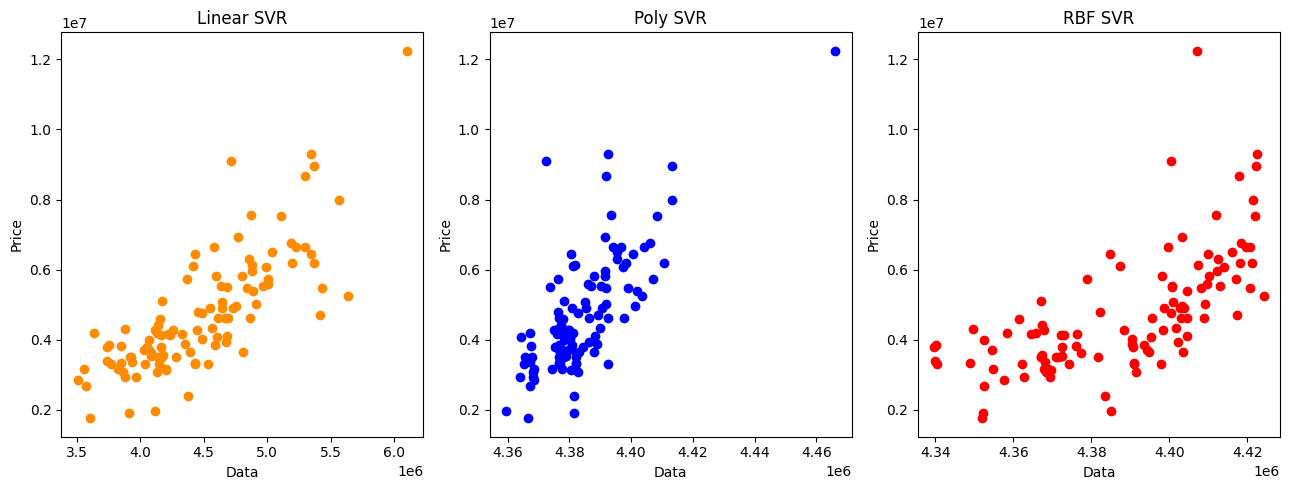

In [229]:
# plot results SVR model
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_lin, Y1_test, color='darkorange', label='test data')
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Linear SVR')

plt.subplot(1, 3, 2)
plt.scatter(y_poly, Y1_test, color='blue', label='test data')
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Poly SVR')

plt.subplot(1, 3, 3)
plt.scatter(y_rbf, Y1_test, color='red', label='test data')
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('RBF SVR')

plt.tight_layout()
plt.show()